#### Illustrative graphs for the Bridge & Torch problem
 - Graph 1: the classic optimal 5-step sequence (ida/volta alternadas)
 - Graph 2: a branching example from the initial state showing two different "ida" choices and their respective "volta"

#### Notes:
- We avoid external libraries (like networkx) and draw with pure matplotlib.
 - We do not set any custom colors or styles (per instructions).


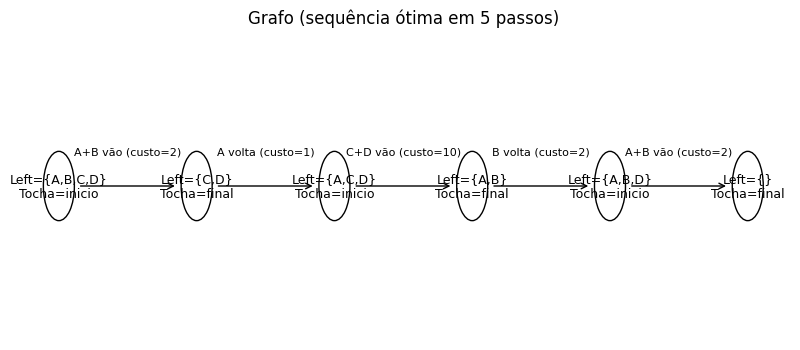

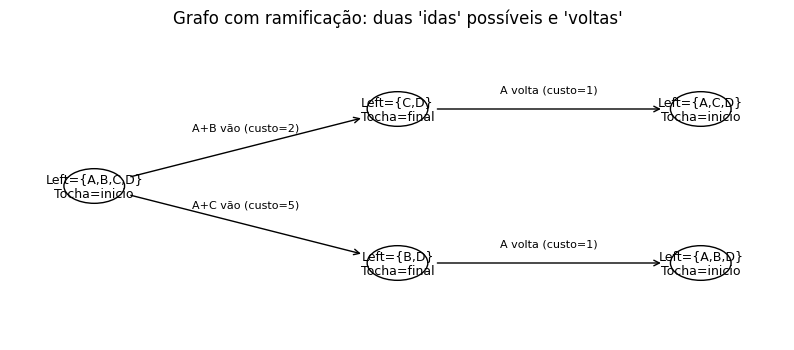

In [1]:
import math
from dataclasses import dataclass
import matplotlib.pyplot as plt

# --- Problem data ---
TIMES = {"A": 1, "B": 2, "C": 5, "D": 10}

def cost_of(move):
    """Cost is the max crossing time among moving people."""
    return max(TIMES[p] for p in move)

def format_state(left_set, torch_side):
    left = "{" + ",".join(sorted(left_set)) + "}"
    return f"Left={left}\nTocha={torch_side}"

# --- Drawing helpers (pure matplotlib) ---
def draw_graph(nodes, edges, title):
    """
    nodes: list of tuples (node_id, label, (x, y))
    edges: list of tuples (src_id, dst_id, edge_label)
    """
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_title(title)
    # Draw nodes
    for nid, label, (x, y) in nodes:
        circle = plt.Circle((x, y), 0.18, fill=False)
        ax.add_patch(circle)
        ax.text(x, y, label, ha="center", va="center", fontsize=9)
    # Draw directed edges with arrow heads and labels
    for src, dst, elabel in edges:
        x1 = next(p for i, _, p in nodes if i == src)[0]
        y1 = next(p for i, _, p in nodes if i == src)[1]
        x2 = next(p for i, _, p in nodes if i == dst)[0]
        y2 = next(p for i, _, p in nodes if i == dst)[1]
        # Slight offset to keep arrows inside the node boundary
        dx, dy = x2 - x1, y2 - y1
        L = math.hypot(dx, dy)
        if L == 0:
            continue
        shrink = 0.22  # a bit larger than node radius to reduce overlap
        xs = x1 + dx * (shrink / L)
        ys = y1 + dy * (shrink / L)
        xe = x2 - dx * (shrink / L)
        ye = y2 - dy * (shrink / L)
        ax.annotate(
            "",
            xy=(xe, ye), xytext=(xs, ys),
            arrowprops=dict(arrowstyle="->", lw=1)
        )
        # Edge label at mid-point
        xm, ym = (xs + xe) / 2.0, (ys + ye) / 2.0
        ax.text(xm, ym + 0.15, elabel, ha="center", va="bottom", fontsize=8)
    ax.set_xlim(min(x for _,_,(x,_) in nodes) - 0.5, max(x for _,_,(x,_) in nodes) + 0.5)
    ax.set_ylim(min(y for _,_,(_,y) in nodes) - 0.8, max(y for _,_,(_,y) in nodes) + 0.8)
    ax.set_xticks([]); ax.set_yticks([])
    ax.axis("off")
    plt.show()

# --- Graph 1: Ótimo de 5 passos (custo total 17) ---
# Sequence:
# 1) A+B vão (2)   -> tocha final
# 2) A volta  (1)  -> tocha início
# 3) C+D vão (10)  -> tocha final
# 4) B volta  (2)  -> tocha início
# 5) A+B vão (2)   -> tocha final

# Build the path states
S0 = (frozenset({"A","B","C","D"}), "inicio")
S1 = (frozenset({"C","D"}), "final")       # A+B foram
S2 = (frozenset({"A","C","D"}), "inicio")  # A voltou
S3 = (frozenset({"A","B"}), "final")       # C+D foram
S4 = (frozenset({"A","B","D"}), "inicio")  # B voltou
S5 = (frozenset(), "final")                # A+B foram (objetivo)

path_states = [S0, S1, S2, S3, S4, S5]
path_labels = [format_state(s[0], s[1]) for s in path_states]
# Position linearly on x-axis
nodes1 = []
for i, lab in enumerate(path_labels):
    nodes1.append((f"P{i}", lab, (i*1.6, 0.0)))

# Edges with action labels and costs
edges1 = [
    ("P0","P1", f"A+B vão (custo={cost_of(['A','B'])})"),
    ("P1","P2", f"A volta (custo={cost_of(['A'])})"),
    ("P2","P3", f"C+D vão (custo={cost_of(['C','D'])})"),
    ("P3","P4", f"B volta (custo={cost_of(['B'])})"),
    ("P4","P5", f"A+B vão (custo={cost_of(['A','B'])})"),
]

draw_graph(nodes1, edges1, "Grafo (sequência ótima em 5 passos)")

# --- Graph 2: Exemplo com ramificação (duas escolhas de 'ida' e respectivas 'volta') ---
# Branches from initial: (A,B) go or (A,C) go; then A returns in both branches.

S0b = S0
S_ab = (frozenset({"C","D"}), "final")       # A+B vão
S_ac = (frozenset({"B","D"}), "final")       # A+C vão
S_ab_backA = (frozenset({"A","C","D"}), "inicio")  # A volta
S_ac_backA = (frozenset({"A","B","D"}), "inicio")  # A volta

labels2 = {
    "Q0": format_state(S0b[0], S0b[1]),
    "Q1": format_state(S_ab[0], S_ab[1]),
    "Q2": format_state(S_ac[0], S_ac[1]),
    "Q3": format_state(S_ab_backA[0], S_ab_backA[1]),
    "Q4": format_state(S_ac_backA[0], S_ac_backA[1]),
}
# Layout with branching
nodes2 = [
    ("Q0", labels2["Q0"], (0.0, 0.0)),
    ("Q1", labels2["Q1"], (1.8,  0.8)),
    ("Q2", labels2["Q2"], (1.8, -0.8)),
    ("Q3", labels2["Q3"], (3.6,  0.8)),
    ("Q4", labels2["Q4"], (3.6, -0.8)),
]
edges2 = [
    ("Q0","Q1", f"A+B vão (custo={cost_of(['A','B'])})"),
    ("Q0","Q2", f"A+C vão (custo={cost_of(['A','C'])})"),
    ("Q1","Q3", f"A volta (custo={cost_of(['A'])})"),
    ("Q2","Q4", f"A volta (custo={cost_of(['A'])})"),
]

draw_graph(nodes2, edges2, "Grafo com ramificação: duas 'idas' possíveis e 'voltas'")